## Variables, Imports, and Setup

Text(0, 0.5, 'Water Drinks (Litre)')

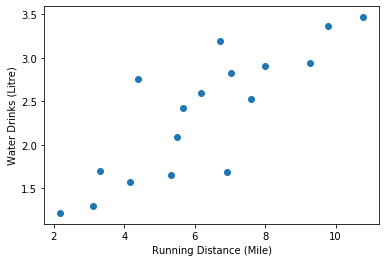

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

# Running Distance in Mile
x = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])

# Water Drinks in Litre
y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

x_bar = np.mean(x)
y_bar = np.mean(y)
xy_bar = np.mean(x*y)
x_squared_bar = np.mean(x**2)
x_bar_squared = (np.mean(x))**2


plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

# Question 1:
## Obtain the MSE for the following two lines:
1- y_pred[i] = 0.7*x[i] + 0.3

2- y_pred[i] = 0.25163494*x[i] + 0.79880123



$MSE = \frac{1}{N} \sum_{i=0}^{N-1} (y_{pred}[i] - y[i])^2$

In [4]:
def min_sq_error(y, x, w1, w0):
    y_pred = [w1*i+w0 for i in x]
    sum_squared_error = sum((y_pred-y)**2)
    N = len(y)
    mse = sum_squared_error/N
    return mse


# Via my calculations
print("#1 MSE via my calculations: ", min_sq_error(y, x, 0.7, 0.3))
print("#2 MSE via my calculations: ", min_sq_error(y, x, 0.25163494, 0.79880123))

# Verify via Numpy
y_pred1 = [0.7*i+0.3 for i in x]
y_pred2 = [0.25163494*i+0.79880123 for i in x]
MSE1 = np.square(np.subtract(y,y_pred1)).mean() 
MSE2 = np.square(np.subtract(y,y_pred2)).mean() 

print("\n#1 MSE via Numpy: ", MSE1)
print("#2 MSE via Numpy: ", MSE2)


#1 MSE via my calculations:  6.518593101764703
#2 MSE via my calculations:  0.15385767404191164

#1 MSE via Numpy:  6.518593101764704
#2 MSE via Numpy:  0.15385767404191164


# Question 2: Obtain the best line

1- Compute:

$\frac{\partial MSE}{\partial w_1}$

and

$\frac{\partial MSE}{\partial w_0}$

2- then obtain $w_1$ and $w_0$ such that:

$\frac{\partial MSE}{\partial w_1} = 0$

and

$\frac{\partial MSE}{\partial w_0} = 0$

<img style="float:left;transform: rotate(90deg); width:100%; height:100%" src="q2_1.jpg" />

<img style="float:left;transform: rotate(90deg); width:100%; height:100%" src="q2_2.jpg" />


# Question 3: Return the slope and intercept

In [13]:
def slope_intercept_LR(x, y, step, epochs):
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    xy_bar = np.mean(x*y)
    x_squared_bar = np.mean(x**2)
    x_bar_squared = (np.mean(x))**2
#     n=len(y)
#     for i in range(epochs):
#         y_pred = w1*x[i]+w0
    w1 = (xy_bar - (x_bar * y_bar))/(x_squared_bar-x_bar_squared)
    w0 = (-w1*x_bar)+y_bar
    return w1, w0
        

print(slope_intercept_LR(x, y, 0.01, 5000))


(0.25163494428355315, 0.7988012261753947)


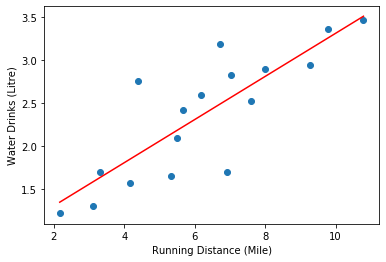

In [53]:
w1 = 0.25163494428355315
w0 = 0.7988012261753947
y_pred = w1*x+w0
#My line of best fit
plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')
plt.plot([min(x), max(x)], [min(y_pred), max(y_pred)], 'r')  # regression line


## Verification

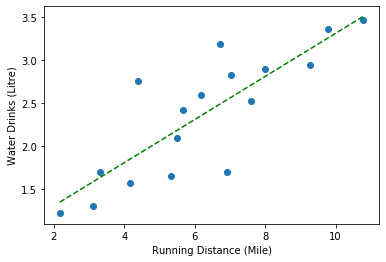

In [52]:
# VERIFICATION
w1 = 0.25163494428355315
w0 = 0.7988012261753947
y_pred = w1*x+w0

plt.scatter(x, y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

# Actual line of best fit using built in functionality
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), 'g--')

# Question 4: Obtain the variance and mean of error

In [50]:
for i in range(len(y)):
    e = y_pred - y[i]

print(e, '\n')

print(np.var(e))
print(np.mean(e))

[0.32919654 0.60599498 0.88279342 1.1872717  1.24263139 0.54761567
 1.95953935 1.05440845 1.40871045 0.04409415 1.2708145  2.21419391
 0.83573769 1.51112588 0.9215452  1.83145716 0.27886955] 

0.3471050941241766
1.0662352941176472


## Plot the distribution of the error for optimal line

Text(0, 0.5, 'Occurences')

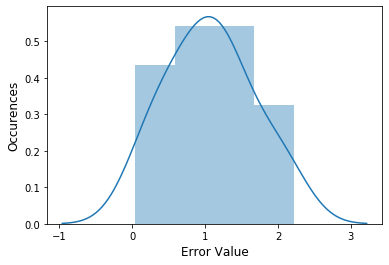

In [51]:
sns.distplot(e, hist=True, kde=True, bins=4)
plt.xlabel('Error Value',fontsize=12)
plt.ylabel('Occurences',fontsize=12)


# Question 5: Update the slope and intercept through iteration

In [32]:
import numpy as np

w_0 = np.random.randn()
w_1 = np.random.randn()
step = 0.01
epoch = 5000
y_pred = w_1*x+w_0
for _ in range(epoch):
    w_1 = w_1 - step*((w_1* x_squared_bar) + (w_0*x_bar)-(2*xy_bar)) #w1 * step * partial derivative
    w_0 = w_0 - step*((-w_1*x_bar) + y_bar) #w0 * step * partial derivative
print(w_1)
print(w_0)

0.37987402377872365
2.4748281764496705
